In [41]:
import h5py
import matplotlib.pyplot as plt

In [8]:
def Load_Dict_from_HDF5(filename, attrs=False):
    # Modified from: https://codereview.stackexchange.com/questions/120802
    # attrs: (Default False) If True, the routine will also load the attributes of each object.
    #        If "Root", it will only load the attributes of the first file node.

    def recursively_load_dict_contents_from_group(h5file, path, attrs):
        ans = {}
        if len(ans) == 0 and not attrs is False:
            ans["Root Attrs"] = {key:(elem if not isinstance(elem, h5py._hl.base.Empty) else []) for key, elem in dict(h5file['/'].attrs).items()}
            if "oo" in attrs: attrs = False
        for key, item in h5file[path].items():
            if isinstance(item, h5py._hl.dataset.Dataset):
                ans[key] = item[()]
                if attrs: ans["%s_Attrs" % key] = dict(item.attrs)
            elif isinstance(item, h5py._hl.base.Empty):
                ans[key] = []
            elif isinstance(item, h5py._hl.group.Group):
                ans[key] = recursively_load_dict_contents_from_group(h5file, path + key + '/', attrs)
                if attrs: ans[key]["Attrs"] = dict(item.attrs)
        return ans

    with h5py.File(filename, 'r') as h5file:
        return recursively_load_dict_contents_from_group(h5file, '/', attrs)


In [10]:
filename='../data/EncDec_NLT_AddT_spth0-0.h5'

In [12]:
data = Load_Dict_from_HDF5(filename)

In [14]:
for key in data:
    print(key)

Locomotion Reference
Pseudo-Predictions


In [ ]:
list(data)

In [22]:
data['Pseudo-Predictions']['Legend matrix']

b"Axis 0: Datapoints\nAxis 1: variables of the pseudo-predictions (0-3: limbs FR-HR-FL-HL terms respectively, 4: nonlinear limb term, 5: sum of all other terms)\nAxis 2: Neurons (lookup table of identity in 'Cell Names')"

firing rate of 4 limbs, nonlinear combination, and sum of all other behavioural modulations = 6 columns in matrix

In [26]:
data['Pseudo-Predictions']['Matrix'].shape # time points x features x neurons

(2691968, 6, 105)

In [30]:
data['Locomotion Reference'].keys()

dict_keys(['Phases', 'Pos. X Matrix', 'Wheel Speed'])

In [34]:
data['Locomotion Reference']['Pos. X Matrix']

array([[90.99115843, 61.21660052, 93.32877186, 51.58358738],
       [90.9668512 , 61.21756405, 93.3816472 , 51.62686859],
       [90.92783095, 61.17885881, 93.43224879, 51.66270934],
       ...,
       [81.47030746, 16.41049584, 77.67612896, 29.82919616],
       [81.48177294, 16.73761238, 77.68022693, 29.84130132],
       [81.48596147, 16.98419261, 77.67593766, 29.85897644]])

In [36]:
data['Locomotion Reference']['Pos. X Matrix'].shape # time points x #limbs

(2691968, 4)

A kinda forward position of each limb (x-axis)

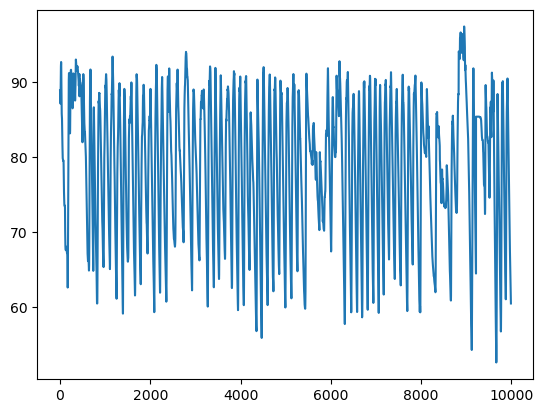

In [49]:
plt.plot(data['Locomotion Reference']['Pos. X Matrix'][10:10000,0])

Firing rate of locomotion is the sum of 1st 5 firing rates (linear and nonlinear). So sum them up. Then Z-score! sRRR from neuronal space to latent (2 dim / 3 dim who knows --- cross validate) to 4 behavioural variables, the x-positions of each limb.